# 7.1

## a)

In [21]:
import numpy as np

sample = np.loadtxt('oldfaithful')
n = sample.size

n_boot = 1000
bootstrap_data = np.random.choice(sample, n*n_boot, replace=True)
bootstrap_samples = np.reshape(bootstrap_data, (n, n_boot))
column_means = bootstrap_samples.mean(axis=0)

a = 0.05
boundaries = [a/2*100, (1-a/2)*100] # here: [2.5%, 97.5%]
confidence_interval = np.percentile(column_means, q=boundaries)
lower, upper = confidence_interval[0], confidence_interval[1]
print('confidence interval: [{:.3f},{:.3f}]'.format(lower, upper))

confidence interval: [201.531,217.810]


## b)

In [22]:
import numpy as np

sample = np.loadtxt('oldfaithful')
n = sample.size

n_boot = 1000
bootstrap_data = np.random.choice(sample, n*n_boot, replace=True)
bootstrap_samples = np.reshape(bootstrap_data, (n, n_boot))
column_means = bootstrap_samples.mean(axis=0)

a = 0.05
boundaries = [a/2*100, (1-a/2)*100] # here: [2.5%, 97.5%]

# interesting part: difference to a)
delta_mean = column_means - sample.mean()
percentiles = np.percentile(delta_mean, q=boundaries)
confidence_interval = sample.mean() - [percentiles[1], percentiles[0]]

lower, upper = confidence_interval[0], confidence_interval[1]
print('confidence interval: [{:.3f},{:.3f}]'.format(lower, upper))

confidence interval: [201.071,217.820]


## c)

$$ P(|\overline{x}-\mu| > 5) $$

In [25]:
import numpy as np

sample = np.loadtxt('oldfaithful')
n = sample.size

n_boot = 1000
bootstrap_data = np.random.choice(sample, n*n_boot, replace=True)
bootstrap_samples = np.reshape(bootstrap_data, (n, n_boot))
column_means = bootstrap_samples.mean(axis=0)
delta_mean = column_means - sample.mean()

lower, upper = np.sum(delta_mean < -5), np.sum(delta_mean > 5)
ratio = (lower+upper)/n_boot
print('P(|x-μ|>5)={:.3f}'.format(ratio))

P(|x-μ|>5)=0.204


# 7.2

$$ X \sim \mathcal{U}([0,10]) $$

## a)

$e$ gesucht, sodass:

$$ I = [\mu_x - e, \mu_x + e], n=60, P=95\% $$

Parameter der Verteilung:

$$ \mu_x=E(X)=\frac{a+b}{2}=\frac{0+10}{2}=5 $$

$$ \sigma_x = \sqrt{Var(X)} = \sqrt{\frac{(b-a)^2}{12}} = \frac{5}{\sqrt{3}} $$

$$ \overline{X}_n \sim \mathcal{N}(\mu_x, \frac{\sigma_x^2}{n}) $$

Standardisierte Zufallsvariable $Z_n \sim \mathcal{N}(0,1)$:

$$ Z_n = \frac{\overline{X}_n - \mu_x}{\frac{\sigma_x}{\sqrt{n}}} $$

Gegebene Wahrscheinlichkeit:

$$ P(\mu_x - e \leq \overline{X}_n \leq \mu_x + e) = 95\% $$

Standardisiert, gesuchtes Intervall ($\mu_x$ von $\mathcal{N}(0,1)$ beträgt $0$):

$$  P\Big(0-\frac{e}{\frac{\sigma_x}{\sqrt{n}}} \leq \overline{Z}_n \leq 0+\frac{e}{\frac{\sigma_x}{\sqrt{n}}}\Big) = 95\% $$ 

$95\%$ der Fläche der Standardnormalverteilung, die beiden $x$ berechnen:

In [9]:
from scipy.stats import norm

lower = norm.ppf(q=0.05/2, loc=0, scale=1)
upper = norm.ppf(q=1-0.05/2, loc=0, scale=1)
print('[{:.2f}, {:.2f}]'.format(lower, upper))

[-1.96, 1.96]


Einsetzen und Gleichung aufstellen um $e$ zu ermitteln (mit ermitteltem $\sigma_x$):

$$ \overline{Z}_n = \frac{e}{\frac{\sigma_x}{\sqrt{n}}} = \frac{e}{\frac{5}{\sqrt{3n}}} = \frac{e\sqrt{3n}}{5} = 1.96 $$

$$ e = \frac{5 \cdot 1.96}{\sqrt{3n}}, n=60, e = \frac{5 \cdot 1.96}{\sqrt{180}} = 0.73 $$

Intervall:

$$ \underline{\underline{I=[5-0.73,5+0.73]}} $$ (mit einer Wahrscheinlichkeit von $95\%$)

## b)

$e=0.2$, aus a) bekannt:

$$ \frac{e\sqrt{3n}}{5} = 1.96$$

umformen:

$$\underline{\underline{n}} = \frac{(5 \cdot 1.96)^2}{e \cdot 3} = \underline{\underline{800}} $$

## c)

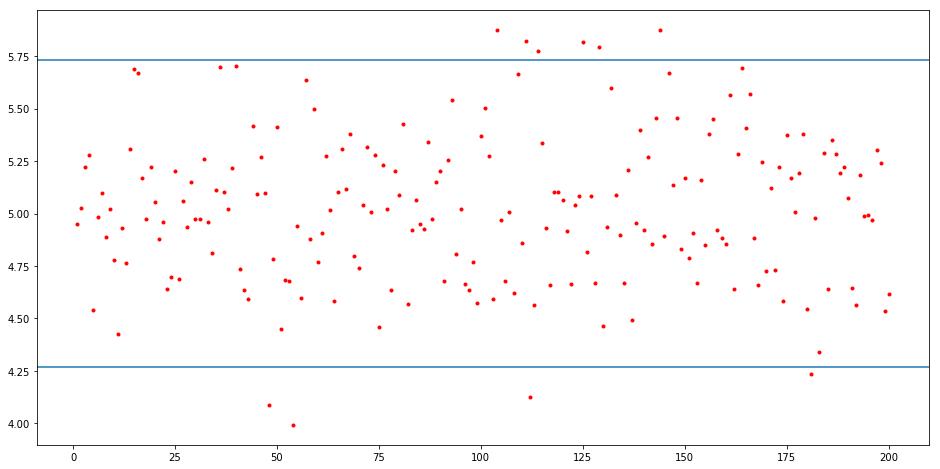

P=95.0%


In [3]:
from math import sqrt
import numpy as np
from scipy.stats import uniform, norm
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['figure.figsize'] = [16, 8]

size = 200
n = 60
#sim = norm.rvs(size=size*n, loc=5, scale=5/sqrt(3))
sim = uniform.rvs(size=size*n, loc=0, scale=10)
sim = sim.reshape(size, n)
sim_mean = sim.mean(axis=1)
plt.plot(np.arange(1, size+1, 1), sim_mean, 'r.')
bounds = [5-0.73, 5+0.73]
plt.axhline(y=bounds[0])
plt.axhline(y=bounds[1])
plt.show()

within = sim_mean[(sim_mean > bounds[0]) & (sim_mean < bounds[1])].size
total = sim_mean.size
rate = within/total
print('P={:.1f}%'.format(rate*100))

# 7.3

$$ X \sim \mathcal{N}(\mu, \sigma^2) $$

## a)

gegeben: $n=10, \overline{x}_n=31ppb, \sigma=6ppb, I: 99\%$

Standardabweichung bekannt:

$$ I=\Big[\overline{x}_{10}+z_{0.005}\cdot\frac{\sigma_x}{\sqrt{n}},\overline{x}_{10}+z_{0.995}\cdot\frac{\sigma_x}{\sqrt{n}}\Big]  $$

In [4]:
from scipy.stats import norm

n = 10
z0005 = norm.ppf(q=0.005, loc=0, scale=1)
z0995 = norm.ppf(q=0.995, loc=0, scale=1)
print('{:.3f}, {:.3f}'.format(z0005, z0995))

-2.576, 2.576


$$ z_{0.005} \cdot \frac{\sigma_x}{\sqrt{n}} = -2.576 \cdot \frac{6}{\sqrt{10}} = -4.89 $$

$$ z_{0.995} \cdot \frac{\sigma_x}{\sqrt{n}} = +2.576 \cdot \frac{6}{\sqrt{10}} = +4.89 $$

$$ \underline{\underline{I}} = [31 - 4.89, 31 + 4.89] = \underline{\underline{[26.11, 35.89]}} $$

In [10]:
from math import sqrt

norm.interval(alpha=0.99, loc=31, scale=6/sqrt(n))

(26.112707522188142, 35.887292477811854)

## b)

gesucht: $n_2$, sodass $I=[31 - \frac{4.89}{2}, 31 + \frac{4.89}{2}]$ (halbes Intervall)

$$ \frac{4.89}{2} = z_{0.995} \cdot \frac{\sigma_x}{\sqrt{n_2}} = 2.576 \cdot \frac{6}{\sqrt{n_2}} \Leftrightarrow \underline{\underline{n_2}} = \Big(\frac{2 \cdot 2.576 \cdot 6}{4.89}\Big)^2 = 39.96 \approx \underline{\underline{40}} $$

gesucht: $n_3$, sodass $I=[31-0.5,31+0.5]$ (Intervall $1ppb$)

$$ \frac{1}{2} = z_{0.995} \cdot \frac{\sigma_x}{\sqrt{n_2}} = 2.576 \cdot \frac{6}{\sqrt{n_3}} \Leftrightarrow \underline{\underline{n_3}} = (2.576 \cdot 6 \cdot 2)^2 = 955.5 \approx \underline{\underline{956}} $$

## c)

gegeben: $\hat{\sigma}=6$

geschätzte Standardabweichung aus der Stichprobe: t-Verteilung mit $n-1$ Freiheitsgraden!

In [2]:
from scipy.stats import t

n = 10
z0005 = t.ppf(q=0.005, df=n-1)
z0995 = t.ppf(q=0.995, df=n-1)
print('{:.3f}, {:.3f}'.format(z0005, z0995))

-3.250, 3.250


$$ z_{0.005} \cdot \frac{\hat{\sigma}}{\sqrt{n}} = -3.25 \cdot \frac{6}{\sqrt{10}} = -6.17 $$

$$ z_{0.995} \cdot \frac{\hat{\sigma}}{\sqrt{n}} = +3.25 \cdot \frac{6}{\sqrt{10}} = +6.17 $$

$$ \underline{\underline{I}} = [31 - 6.17, 31 + 6.17] = \underline{\underline{[24.83, 37.17]}} $$

$$ I_{a)} = 35.89-26.11 = 9.78, I_{b)} = 37.17-24.83 = 12.34, \frac{12.34-9.78}{9.78} = 0.26 \approx 26 \% $$

Das Intervall wurde um ca $26\%$ grösser.

In [3]:
from math import sqrt

t.interval(alpha=0.99, df=n-1, loc=31, scale=6/sqrt(n))

(24.833870595963425, 37.166129404036575)

# 7.4

gegeben: $n=9,\overline{x}_n=-403\mu g,\hat{\sigma}_x=3.127\mu g$

## a)

gegeben: $X \sim \mathcal{N}(\mu, \sigma_x^2), \alpha=95\%$

wahres $\sigma$ unbekannt: t-Verteilung!

$$ I = \Big[ \overline{x}_n + z_{\frac{1-\alpha}{2}} \cdot \frac{\hat{\sigma}_x}{\sqrt{n}}, \overline{x}_n + z_{\alpha+\frac{1-\alpha}{2}} \cdot \frac{\hat{\sigma}_x}{\sqrt{n}}  \Big] $$

$$ z_{\frac{1-\alpha}{2}} = z_{0.025}, z_{\alpha+\frac{1-\alpha}{2}} = z_{0.975} $$



In [3]:
from scipy.stats import t

n = 9
alpha = 0.95

z0025 = t.ppf(q=(1-alpha)/2, df=n-1)
z0975 = t.ppf(q=alpha+(1-alpha)/2, df=n-1)
print('{:.3f}, {:.3f}'.format(z0025, z0975))

-2.306, 2.306


$$ \pm 2.306 \cdot \frac{\hat{\sigma}_x}{\sqrt{n}} = 2.306 \cdot \frac{3.127\mu g}{\sqrt{9}} = \pm 2.404 \mu g $$

$$ \underline{\underline{I = [-405.4 \mu g, -400.6 \mu g]}} $$

In [4]:
from math import sqrt

t.interval(alpha=0.95, df=8, loc=-403, scale=3.127/sqrt(9))

(-405.40362497674977, -400.59637502325023)

## b)

Da $-400.0\mu g$ nicht in einem Vertrauensintervall von $95\%$ liegt, würde die Nullhypothese $H_0$ zugunsten der Alternativhypothese $H_A$ verworfen werden.

Die Wahrscheinlichkeit, dass die wahre Differenz $-400.0\mu g$ beträgt, liegt ca. bei $1\%$:

$$ 403\mu g - 400\mu g = 3 \mu g$$

$$ z \cdot \frac{3.127\mu g}{\sqrt{9}} = 3 \mu g \Leftrightarrow z = \frac{3\mu g\sqrt{9}}{3.127\mu g} $$

In [5]:
z = (3 * sqrt(9)) / 3.127
1-t.cdf(x=z, df=8)

0.010284811560763774

# 7.5

$$ X = [520, 512, 499, 524, 505], n=5, \overline{x}_5=512, s_x^2=106.5 $$

$$ X \sim \mathcal{N}(\mu, \sigma^2) $$

## a)

$H_0: \mu=500$: Es handelt sich um die älteren, weniger sicheren Schrauben

$H_A: \mu>500$: Es handelt sich um die neueren, sichereren Schrauben

Begründung: Zweifel als Grundhaltung! Solange man sich nicht mit hoher Wahrscheinlichkeit von der verbesserten Qualität der Schrauben hat überzeugen können, gelten die Schrauben als unsicher und werden _nicht_ verbaut.

## b)

t-Test mit $\alpha=0.05$

$$ X \sim \mathcal{t}(\mu_x, \frac{s_x^2}{\sqrt{n}}) $$

**Entgegen Teilaufgabe a) lauten die Hypothesen hier:**

$H_0$: Es handelt sich um die sicheren Schrauben

$H_A$: Es handelt sich um die unsicheren Schrauben

In [30]:
import numpy as np
from scipy.stats import t

sample = np.array([520, 512, 499, 524, 505])
n = sample.size
var = sample.std(ddof=1)**2
std = np.sqrt(var)

x0 = t.ppf(q=0.95, df=n-1, loc=500, scale=std/np.sqrt(n))
print('Verwerfungsbereich: [{:.3f},∞)'.format(x0))
print('Mean der Stichprobe: {:.3f}'.format(sample.mean()))

Verwerfungsbereich: [509.839,∞)
Mean der Stichprobe: 512.000


$H_0$ wird verworfen, es handelt sich wohl um die sicheren Schrauben.

## c)

In [26]:
t.interval(alpha=0.95, df=n-1, loc=sample.mean(), scale=std/np.sqrt(n))

(499.1861719188852, 524.8138280811148)

## d)

$\sigma=s_x^2=106.5$: Normalverteilung statt t-Verteilung!

In [27]:
from scipy.stats import norm

norm.interval(alpha=0.95, loc=sample.mean(), scale=std/np.sqrt(n))

(502.95438930304954, 521.0456106969505)

## e)

$$ H_0: \mu=0, H_A: \mu > 0, \alpha=0.05 $$

- Man verwirft $H_0$ für kein Niveau $\alpha < 0.05$: richtig
- Es gibt ein Niveau $\alpha < 1$, bei dem man $H_0$ verwirft: richtig
- Der $p$-Wert ist strikt kleiner als $0.5$: richtig
- Führt man statt eines einseitigen einen zweiseitigen Test zum Niveau 0.05 durch, verwirft man $H_0$ nicht: richtig
- Wenn man die Daten immer öfter kopiert (d.h., man betrachtet jeden Datenpunkt $k$-Mal, so dass man insgesamt $k \cdot n$ Datenpunkte erhält), verwirft man $H_0$ für ein grosses $k$ beim Niveau $0.05$: richtig